In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("../../../data/kc_house_data.csv", index_col = "id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [6]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [60]:
df["sqft_basement"] = df["sqft_basement"].replace("0.0", np.nan)
df["sqft_basement"] = df["sqft_basement"].replace("?", np.nan)
df["sqft_basement"] = df["sqft_basement"].fillna(0.0)
df["sqft_basement"] = df["sqft_basement"].map(lambda x: float(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64

In [7]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df["waterfront"] = df["waterfront"].fillna(0.0)

In [9]:
df["view"] = df["view"].fillna(0.0)

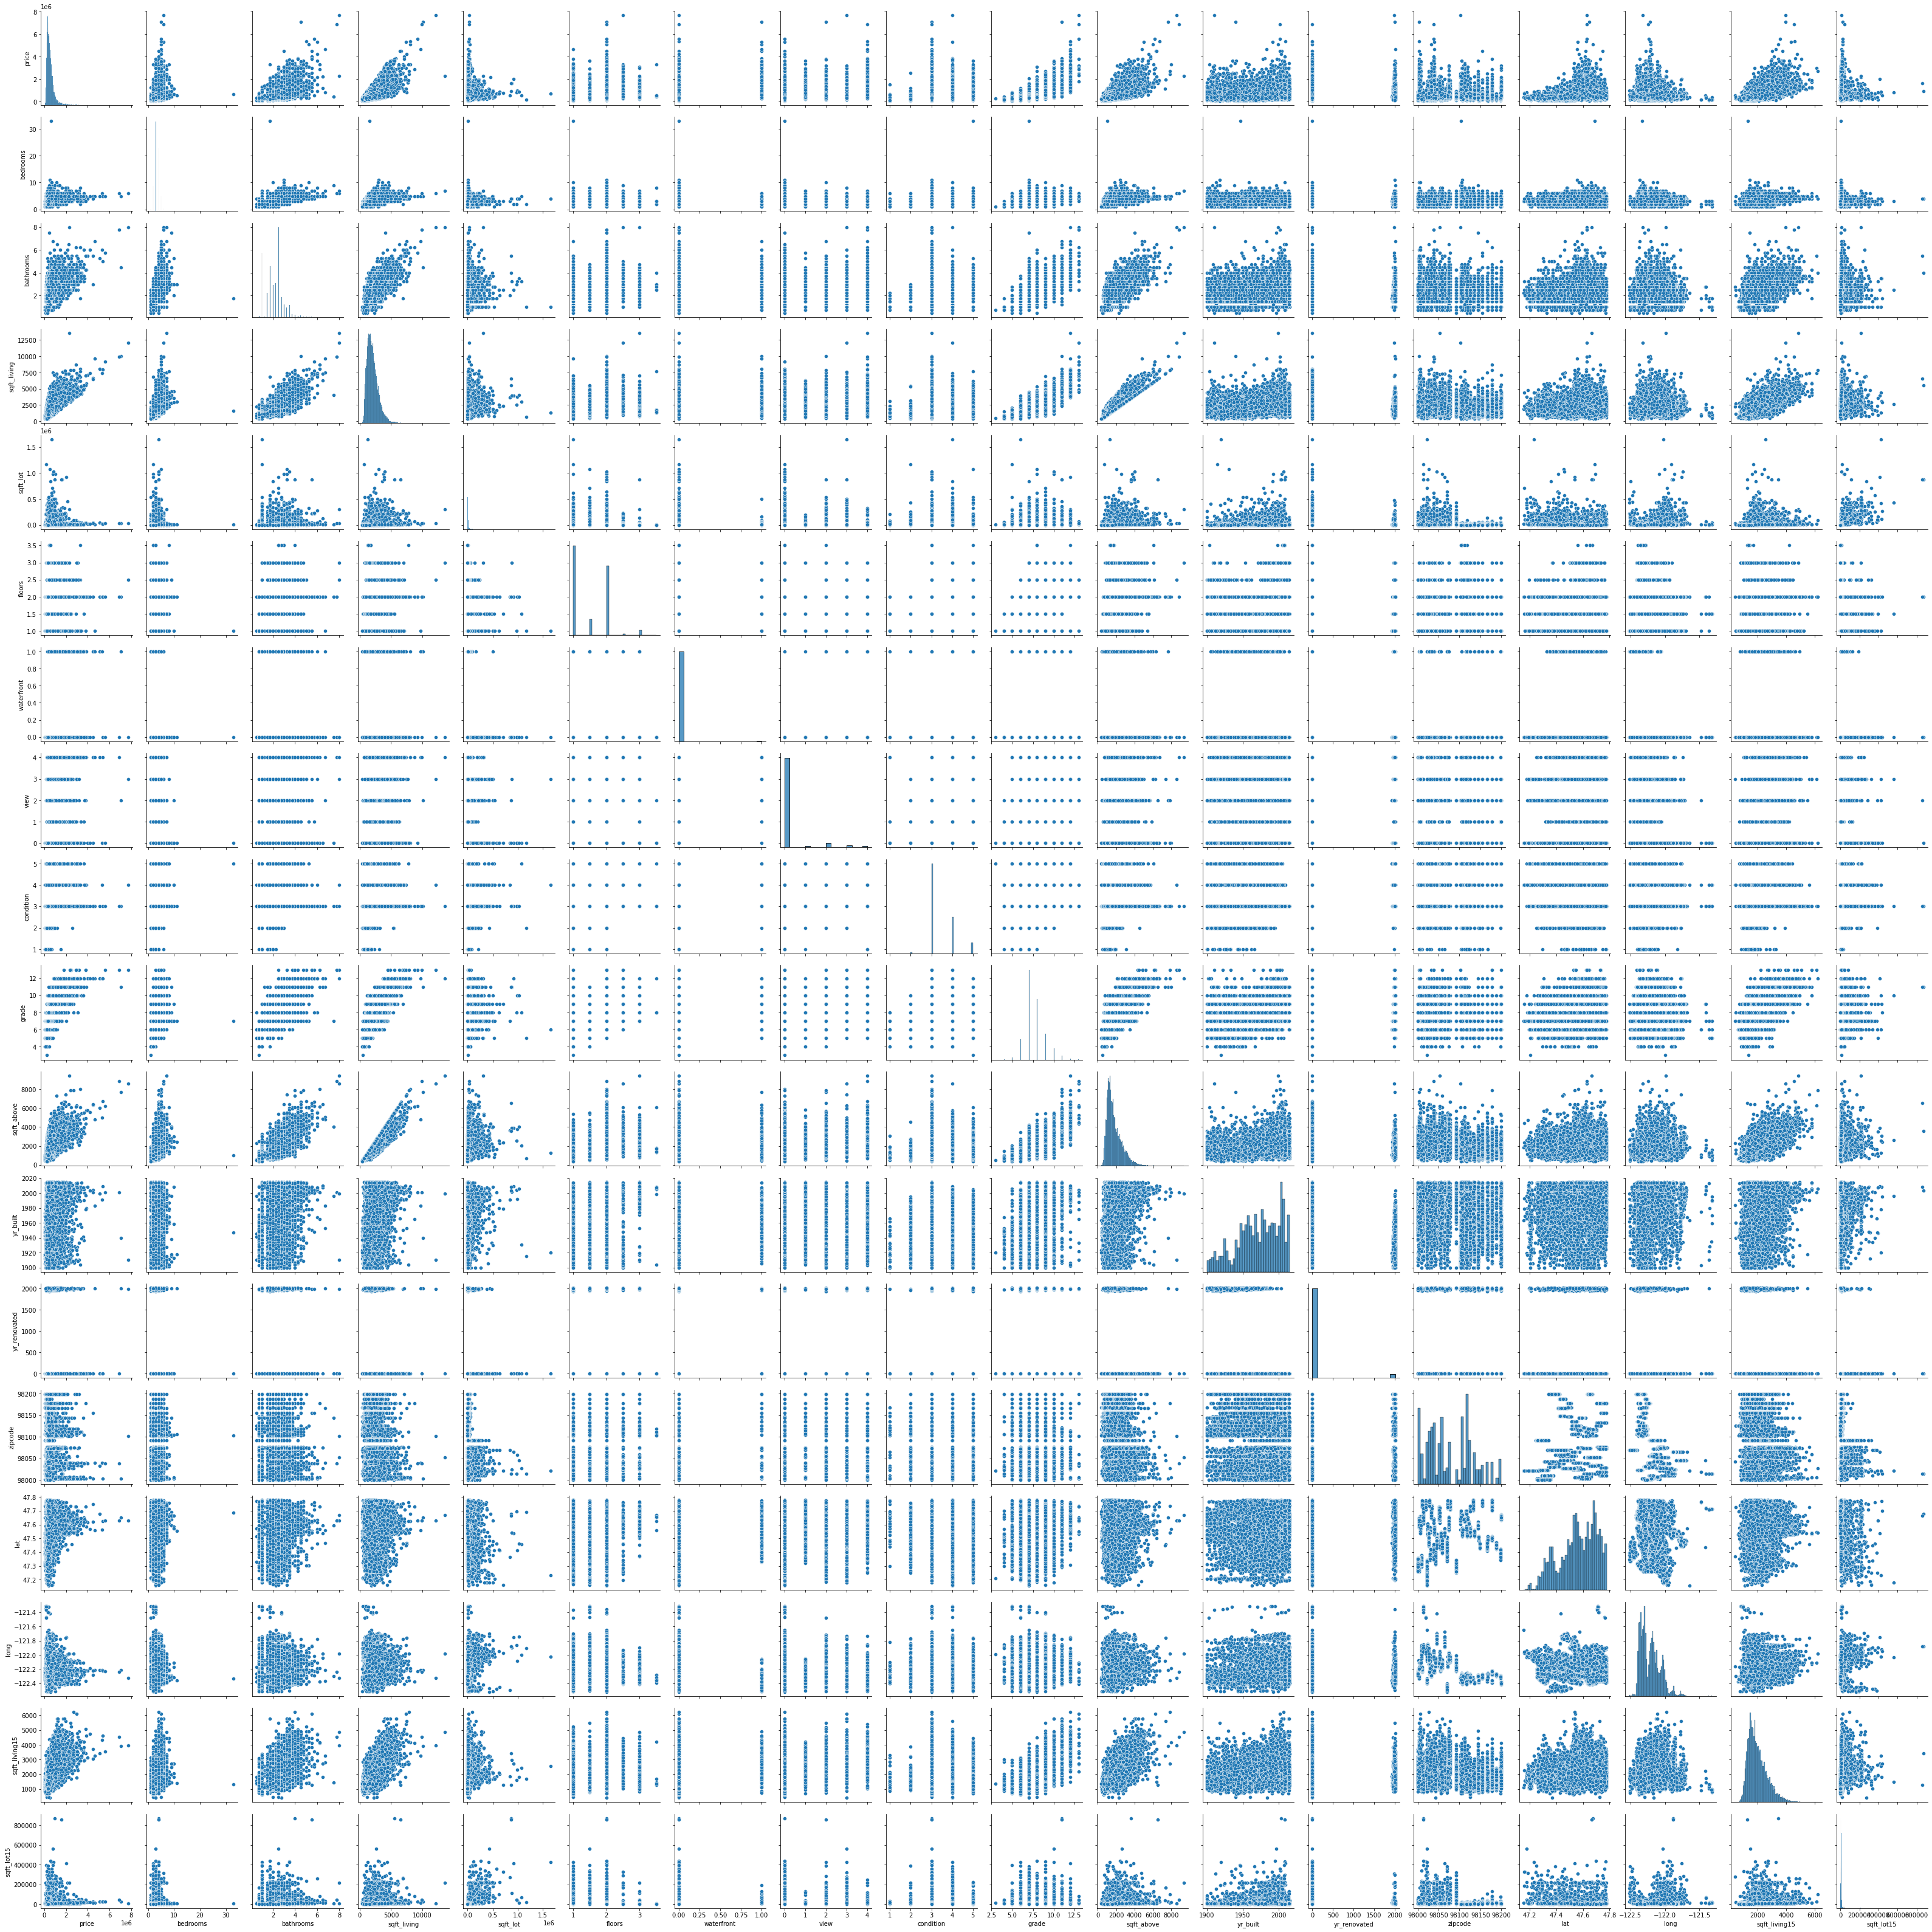

In [23]:
sns.pairplot(df);

In [10]:
df["yr_renovated"] = df["yr_renovated"].replace(0.0, np.nan)

In [11]:
df.isna().sum()

date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [12]:
df.loc[df["yr_built"] > df["yr_renovated"]]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,


In [13]:
df = df.drop("yr_renovated", axis = 1)

In [111]:
df = df.loc[df["bedrooms"] < 33]

In [135]:
df = df.loc[df["sqft_lot"] < 1000000]

In [185]:
df = df.loc[df["sqft_living"] < 10000]

In [ ]:
df = df.drop_duplicates()

In [186]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_simple = df.drop(["date", "price", "waterfront", "view", "floors"], axis = 1)

In [187]:
predictors = "+".join(df_simple)
f = "price ~" + predictors
model = ols(formula = f, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3043.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        11:46:11   Log-Likelihood:            -2.9515e+05
No. Observations:               21589   AIC:                         5.903e+05
Df Residuals:                   21574   BIC:                         5.904e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.211e+06   2.98e+06     -2.082      0.037   -1.21e+07   -3.64e+05
bedrooms      -4.822e+04   2052.375    -23.493      0.000   -5.22e+04   -4.42e+04
bathrooms       5.21e+04   3249.201     16.033      0.000    4.57e+04    5.85e+04
sqft_living     118.2805     18.762      6.304      0.000      81.505     155.056
sqft_lot          0.1755      0.058      3.011      0.003       0.061       0.290
condition      2.597e+04   2408.920     10.779      0.000    2.12e+04    3.07e+04
grade          1.049e+05   2236.419     46.913      0.000    1.01e+05    1.09e+05
sqft_above       62.3915     18.691      3.338      0.001      25.755      99.028
sqft_basement    50.6608     18.643      2.717      0.007      14.119      87.202
yr_built      -2969.9126     69.830    -42.530      0.000   -3106.785   -2833.040
zipcode        -462.9698     34.052    -13.596      0.000    -529.714    -396.226
lat            5.528e+05   1.11e+04     49.886      0.000    5.31e+05    5.75e+05
long           -2.49e+05   1.36e+04    -18.269      0.000   -2.76e+05   -2.22e+05
sqft_living15    41.4393      3.532     11.732      0.000      34.516      48.362
sqft_lot15       -0.3433      0.081     -4.215      0.000      -0.503      -0.184
==============================================================================
Omnibus:                    17450.193   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1054427.675
Skew:                           3.456   Prob(JB):                         0.00
Kurtosis:                      36.532   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
df.loc[df["bathrooms"] < 1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
1222000055,11/23/2014,180250.0,2,0.75,900,9600,1.0,0.0,0.0,3,6,900,0.0,1941,98166,47.4604,-122.339,1250,14280
2123039032,10/27/2014,369900.0,1,0.75,760,10079,1.0,1.0,4.0,5,5,760,0.0,1936,98070,47.4683,-122.438,1230,14267
7325600160,6/4/2014,299000.0,1,0.75,560,12120,1.0,0.0,0.0,3,4,560,0.0,1967,98014,47.6750,-121.854,1300,19207
8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,430,0.0,1912,98014,47.6499,-121.909,1200,7500
4045500710,12/18/2014,405000.0,2,0.75,1160,15029,1.0,0.0,0.0,4,6,870,290.0,1937,98014,47.6929,-121.870,1870,25346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5016001619,1/22/2015,699999.0,3,0.75,1240,4000,1.0,0.0,0.0,4,7,1240,0.0,1968,98112,47.6239,-122.297,1460,4000
2114700090,3/1/2015,151000.0,2,0.75,720,5040,1.0,0.0,0.0,3,4,720,0.0,1949,98106,47.5323,-122.347,1290,4120
1025039168,9/23/2014,290000.0,1,0.75,740,1284,1.0,0.0,0.0,4,6,740,0.0,1928,98107,47.6741,-122.406,1430,3988


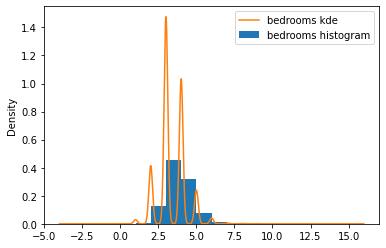

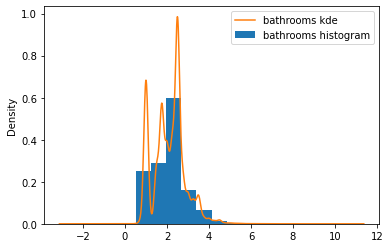

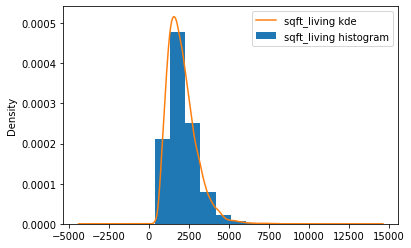

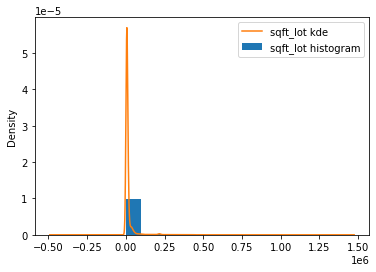

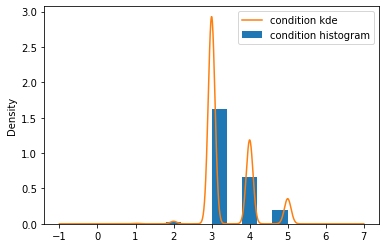

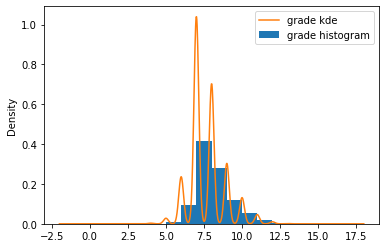

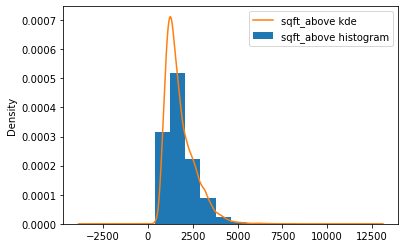

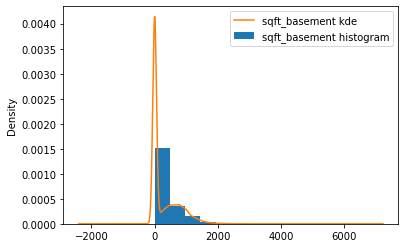

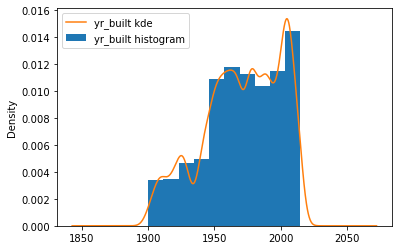

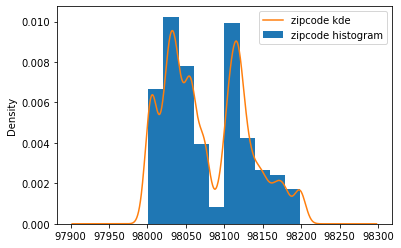

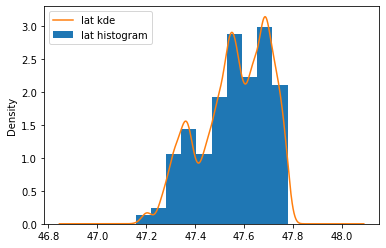

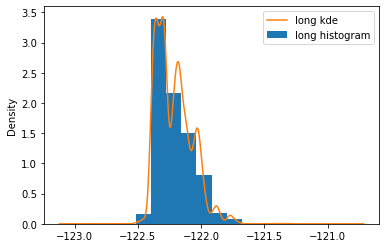

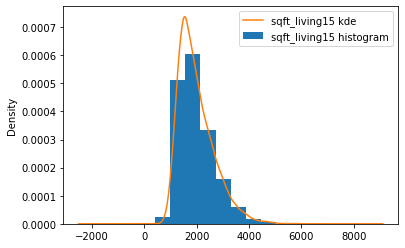

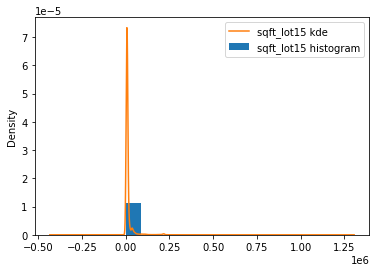

In [207]:
for column in df_simple:
    df_simple[column].plot.hist(density = True, label = column+ " histogram")
    df_simple[column].plot.kde(label = column+ " kde")
    plt.legend()
    plt.show();

In [208]:
df_corr = df.drop(["date", "waterfront", "view"], axis = 1).corr().abs().stack().reset_index()
df_corr

,level_0,level_1,0
0,price,price,1.000000
1,price,bedrooms,0.316428
2,price,bathrooms,0.525125
3,price,sqft_living,0.699594
4,price,sqft_lot,0.097084
...,...,...,...
251,sqft_lot15,zipcode,0.147276
252,sqft_lot15,lat,0.085274
253,sqft_lot15,long,0.255767
254,sqft_lot15,sqft_living15,0.182740


In [209]:
df_corr = df_corr.loc[(df_corr["level_0"] == "price") | (df_corr["level_1"] == "price")]

In [210]:
df_corr["pairs"] = df_corr["level_0"] +" & "+ df_corr["level_1"]
df_corr = df_corr.drop(["level_0", "level_1"], axis = 1)
df_corr = df_corr.set_index("pairs")
df_corr

<ipython-input-210-fd0afd295c14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr["pairs"] = df_corr["level_0"] +" & "+ df_corr["level_1"]


,0
pairs,
price & price,1.000000
price & bedrooms,0.316428
price & bathrooms,0.525125
price & sqft_living,0.699594
price & sqft_lot,0.097084
price & floors,0.258117
price & condition,0.036400
price & grade,0.672668
price & sqft_above,0.603018


In [211]:
df_corr.columns = ["cc"]
df_corr = df_corr.loc[(df_corr["cc"] < 1)]
df_corr.sort_values("cc", ascending = False).drop_duplicates(subset = "cc")

,cc
pairs,
price & sqft_living,0.699594
grade & price,0.672668
sqft_above & price,0.603018
price & sqft_living15,0.589792
bathrooms & price,0.525125
price & bedrooms,0.316428
price & sqft_basement,0.315172
lat & price,0.310930
floors & price,0.258117


In [212]:
top5_predictors = ["sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms"]

In [243]:

df_log = np.log(pd.concat([df[top5_predictors], df["price"]], axis = 1))

def standardize(x):
    return (x - np.mean(x))/np.std(x)

df_norm = standardize(df_log)


In [253]:
for predictor in top5_predictors:
    model = ols(formula = f"price ~ {predictor}", data = df_norm).fit()
    print(model.summary(), "\n")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                 1.797e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:36:44   Log-Likelihood:                -24096.
No. Observations:               21589   AIC:                         4.820e+04
Df Residuals:                   21587   BIC:                         4.821e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.478e-13      0.005  -2.94e-11      

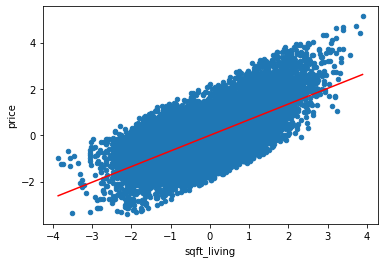

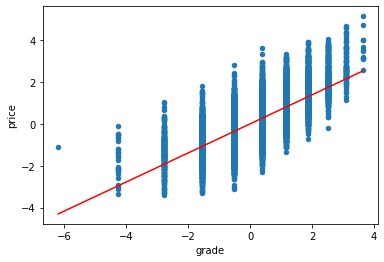

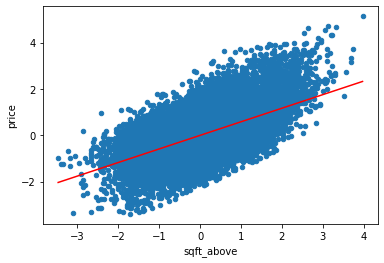

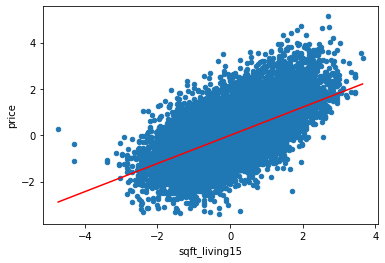

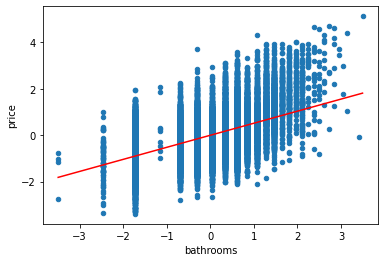

In [244]:
for predictor in top5_predictors:
    model = ols(formula = f"price ~ {predictor}", data = df_norm).fit()
    df_predict = pd.DataFrame({f"{predictor}": [df_norm[predictor].min(), df_norm[predictor].max()]})
    df_norm.plot(kind = "scatter", x = f"{predictor}", y = "price")
    plt.plot(df_predict, model.predict(df_predict), color = "red")

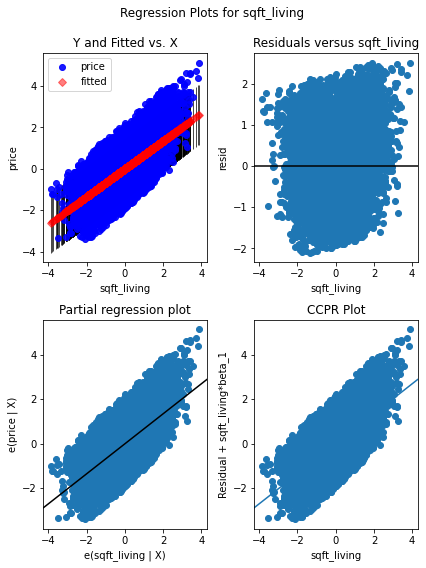

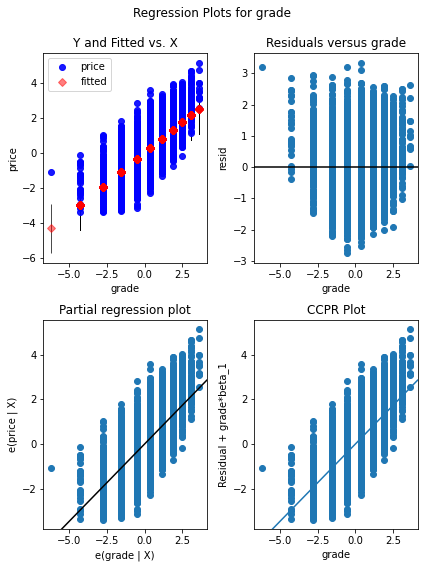

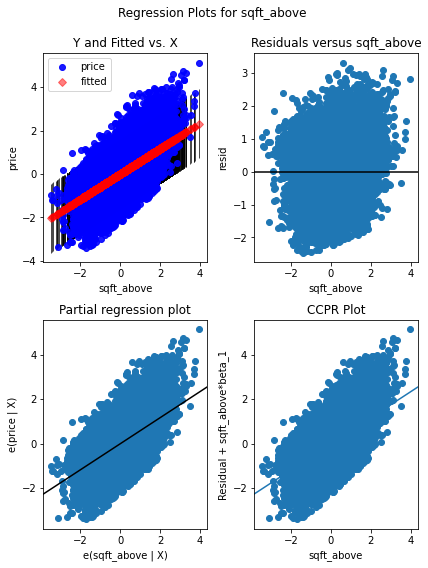

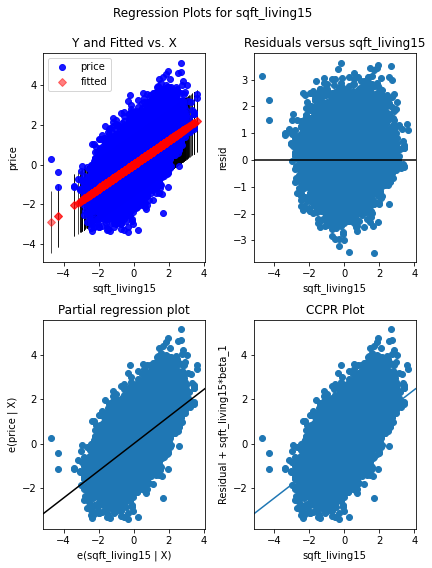

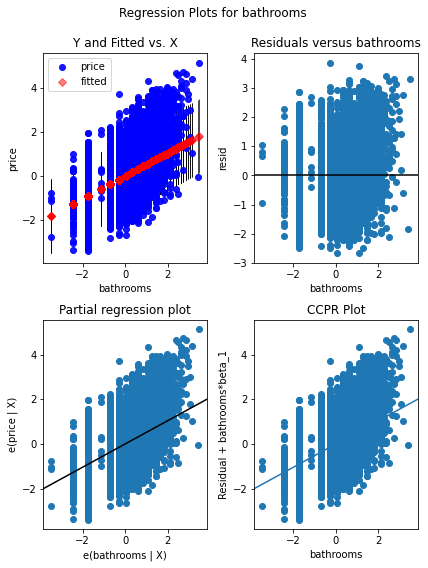

In [245]:
for predictor in top5_predictors:
    model = ols(formula = f"price ~ {predictor}", data = df_norm).fit()
    
    fig = plt.figure(figsize = (6,8))
    fig = sm.graphics.plot_regress_exog(model, f"{predictor}", fig = fig);

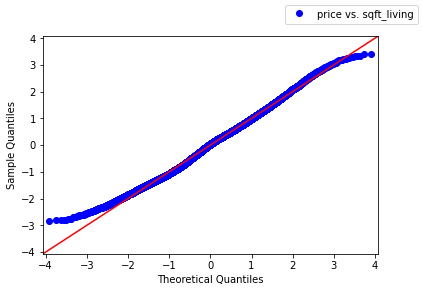

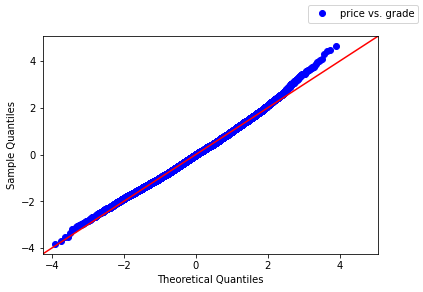

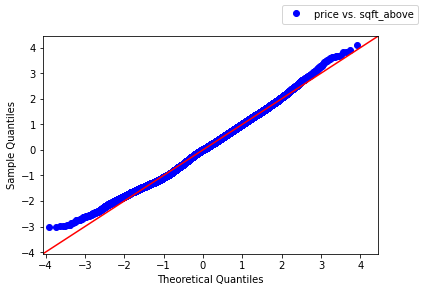

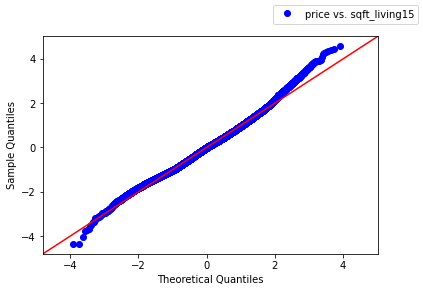

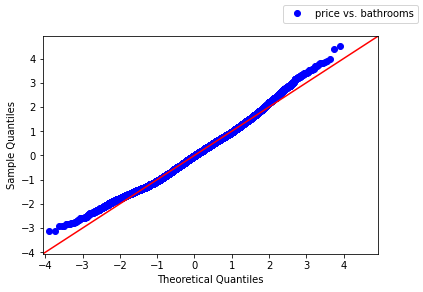

In [247]:
import scipy.stats as stats

for predictor in top5_predictors:
    model = ols(formula = f"price ~ {predictor}", data = df_norm).fit()
    
    fig = sm.graphics.qqplot(model.resid, dist = stats.norm, fit = True, line = "45", label = f"price vs. {predictor}")
    fig.legend();

In [ ]:
scaling continous features
errors have equal variance
make sure non of our features have 0.7 or higher cc with one another
look at seasons, bin date into seasons